# Explore IGRA soundings database 

### Raw, and 25mb interpolated, all .nc (open in xarray)

In [72]:
import xarray as xr
import numpy as np

In [2]:
ds = xr.open_dataset('~/Box/IGRA_soundings_data/INDIA/INM00043371_THIRUVANANTHAPURAM.nc')

In [89]:
ds.assign_coords(time=ds.time.astype('int').astype('str'))
ds

<xarray.Dataset>
Dimensions:  (time: 57061, var: 7, lev: 290)
Coordinates:
  * time     (time) float64 1.928e+09 1.928e+09 ... 2.019e+09 2.019e+09
  * var      (var) int32 0 1 2 3 4 5 6
Dimensions without coordinates: lev
Data variables:
    data     (time, lev, var) float32 nan 60.0 nan nan nan ... nan nan nan nan

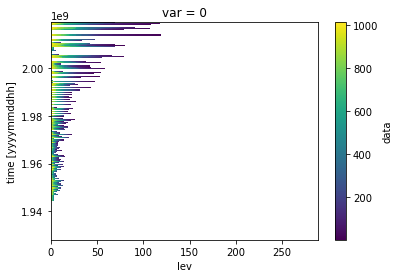

In [91]:
ds.data[:,:,0].plot() # 0 = pressure

# Data interpolated to 25mb levels

In [26]:
ds25 = xr.open_dataset('~/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.INM00043371_THIRUVANANTHAPURAM.nc')

In [108]:
date = ds25.time.values
date.astype('int').astype('str')

array(['1947060715', '1947060816', '1947061415', ..., '2019081212',
       '2019081300', '2019081312'], dtype='<U21')

In [110]:
ds25.assign_coords(time=ds25.time.values.astype('int').astype('str')) # doesnt work? 
#ds25.assign_coords(time=ds25.time.astype('int')) # doesnt work? 
ds25

<xarray.Dataset>
Dimensions:       (time: 29755, lev: 42, var: 19)
Coordinates:
  * time          (time) float64 1.947e+09 1.947e+09 ... 2.019e+09 2.019e+09
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables: (12/25)
    Data          (time, lev, var) float32 ...
    InterpLevNum  (time) float64 3.0 3.0 6.0 6.0 9.0 ... 28.0 51.0 35.0 44.0
    variables     (var) object 'reported pressure' ... 'refractive index'
    units         (var) object 'hPa' 'm' 'm' 'K' ... 'm/s/km' 'm/s' 'm/s/km' '1'
    release_time  (time) float64 nan nan nan ... 1.133e+03 2.349e+03 1.135e+03
    PW            (time) float32 nan nan nan nan ... 63.3 61.39 63.12 59.75
    ...            ...
    LI            (time) float32 nan nan -9.0 -2.0 -7.0 ... -1.0 -2.0 0.0 -5.0
    SI            (time) float32 nan nan -5.0 0.0 -3.0 ... -3.0 -3.0 -2.0 -2.0
    KI            (time) float32 nan nan 42.0 33.0 39.0 ... 39.0 40.0 39.0 37.0
    TTI           (time) float32 nan nan 49.0 41.0 48.0 ... 44.0 46.0 43.0 44.0
    CAPE          (time) float32 nan nan nan nan ... 571.0 773.0 77.0 3.67e+03
    CIN           (time) float32 nan nan nan nan ... -179.0 -198.0 -277.0 -6.0

(array([1.3000e+01, 8.5000e+01, 8.1500e+02, 4.7660e+03, 1.2093e+04,
        9.0230e+03, 2.0790e+03, 2.5500e+02, 3.3000e+01, 6.0000e+00]),
 array([427.92   , 456.095  , 484.27002, 512.445  , 540.62   , 568.795  ,
        596.97   , 625.145  , 653.32   , 681.495  , 709.67   ],
       dtype=float32),
 <BarContainer object of 10 artists>)

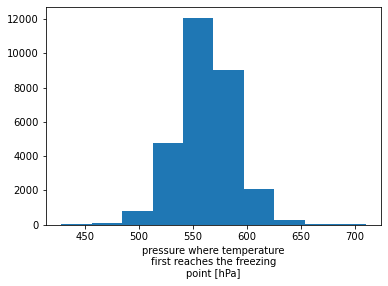

In [96]:
ds25.FrzPress.plot.hist()

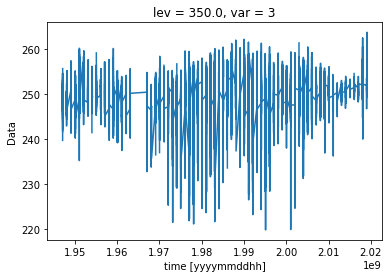

In [101]:
ds25.Data[:,26,3].plot() ## 3 is reported pressure, 25 is 350 hPa 
#title('surprising cold winters for 9N')

(array([9.0000e+00, 2.2000e+01, 2.9000e+01, 5.1000e+01, 1.5300e+02,
        1.5110e+03, 1.3392e+04, 1.1729e+04, 1.1570e+03, 3.8000e+01]),
 array([219.74869, 224.15471, 228.56073, 232.96674, 237.37276, 241.77878,
        246.1848 , 250.59082, 254.99683, 259.40286, 263.80887],
       dtype=float32),
 <BarContainer object of 10 artists>)

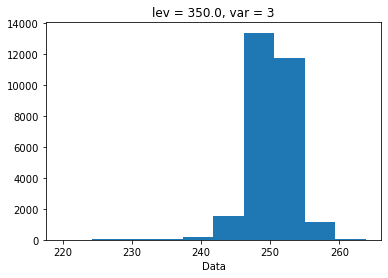

In [48]:
ds25.Data[:,26,3].plot.hist()

(array([7.000e+00, 4.500e+01, 4.190e+02, 1.670e+03, 4.889e+03, 6.801e+03,
        3.236e+03, 3.570e+02, 2.900e+01, 5.000e+00]),
 array([ 1.51    , 10.297   , 19.084   , 27.870998, 36.657997, 45.445   ,
        54.232   , 63.018997, 71.806   , 80.592995, 89.38    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

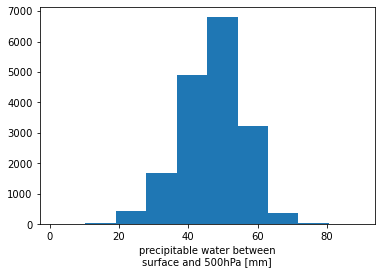

In [83]:
ds25.PW.plot.hist()

In [102]:
ds25S = xr.open_dataset('~/Box/IGRA_soundings_data/INDIA/IntAllLevelsObstimes.derived.25mb.SEM00063985_SEYCHELLES.nc')

In [103]:
ds25S.assign_coords(time=ds25S.time.astype('int').astype('str'))

<xarray.Dataset>
Dimensions:       (time: 14082, lev: 42, var: 19)
Coordinates:
  * time          (time) <U21 '1976070612' '1976070706' ... '2019063012'
  * lev           (lev) float32 1e+03 975.0 950.0 925.0 ... 50.0 30.0 20.0 10.0
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables: (12/25)
    Data          (time, lev, var) float32 ...
    InterpLevNum  (time) float64 ...
    variables     (var) object ...
    units         (var) object ...
    release_time  (time) float64 ...
    PW            (time) float32 ...
    ...            ...
    LI            (time) float32 ...
    SI            (time) float32 ...
    KI            (time) float32 ...
    TTI           (time) float32 ...
    CAPE          (time) float32 ...
    CIN           (time) float32 ...

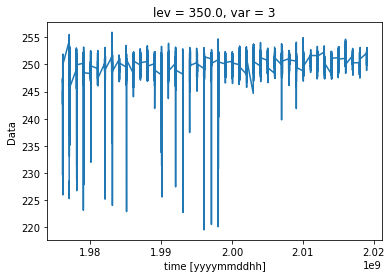

In [107]:
ds25S.Data[:,26,3].plot() ## 3 is reported pressure, 25 is 350 hPa 

(array([6.000e+00, 1.010e+02, 7.910e+02, 2.119e+03, 2.955e+03, 3.405e+03,
        2.665e+03, 6.780e+02, 5.000e+01, 2.000e+00]),
 array([12.4     , 18.478   , 24.556   , 30.633999, 36.711998, 42.79    ,
        48.868   , 54.946   , 61.024002, 67.102   , 73.18    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

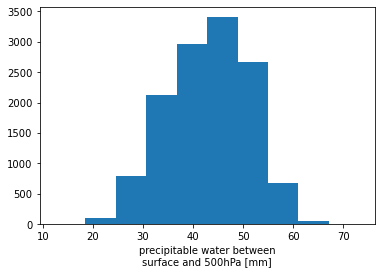

In [105]:
ds25S.PW.plot.hist()

(array([4.000e+00, 8.000e+01, 5.760e+02, 2.895e+03, 5.841e+03, 3.726e+03,
        8.080e+02, 7.500e+01, 1.400e+01, 3.000e+00]),
 array([497.77 , 513.062, 528.354, 543.646, 558.938, 574.23 , 589.522,
        604.814, 620.106, 635.398, 650.69 ], dtype=float32),
 <BarContainer object of 10 artists>)

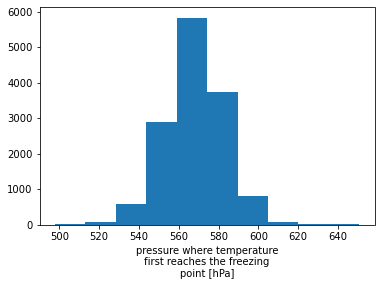

In [111]:
ds25S.FrzPress.plot.hist()

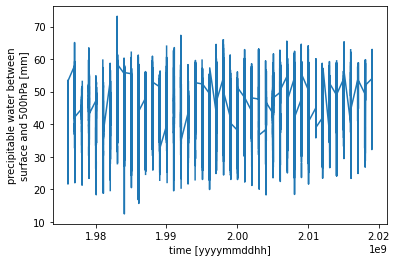

In [112]:
ds25S.PW.plot()